In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [4]:
def plot(df):
    plt.figure(figsize=(8, 8))
    sns.histplot(df['label'])

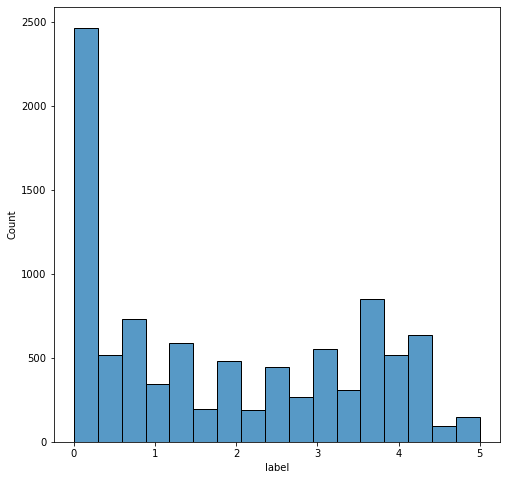

In [5]:
plot(train)

<h1>Data Augmentation</h1>

<h2>Sentence Swap</h2>

In [6]:
for idx in train.index:
    train.loc[len(train)] = [ 
                    'boostcamp-sts-v1-df-' + str(len(train)), 
                    train['source'][idx],
                    train['sentence_2'][idx], 
                    train['sentence_1'][idx],
                    train['label'][idx],
                    train['binary-label'][idx]
                    ]

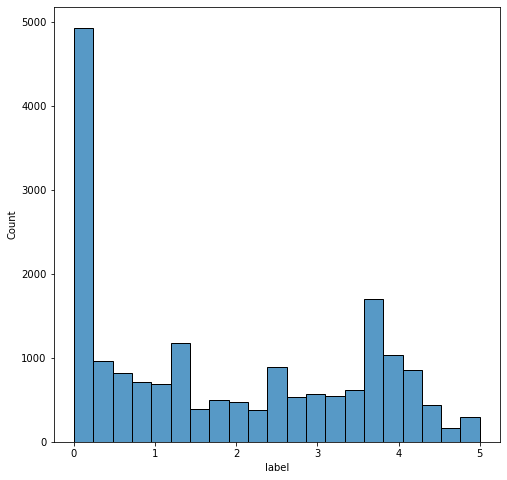

In [7]:
plot(train)

<h2>Sentence Copy and Reversal</h2>

In [8]:
for idx in train.index:
    if train['label'][idx] == 0:
        train.loc[len(train)] = [ 
                        'boostcamp-sts-v1-df-' + str(len(train)), 
                        train['source'][idx],
                        train['sentence_1'][idx], 
                        train['sentence_1'][idx],
                        5.0,
                        1.0
                        ]
    elif train['label'][idx] == 5:
        train.loc[len(train)] = [ 
                        'boostcamp-sts-v1-df-' + str(len(train)), 
                        train['source'][idx],
                        train['sentence_1'][idx], 
                        train['sentence_1'][idx][::-1],
                        0.0,
                        0.0
                        ]

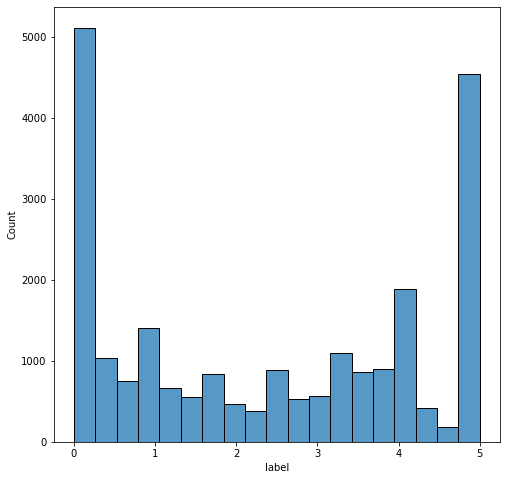

In [9]:
plot(train)

<h2>Data Resampling</h2>

In [10]:
# add label_range feature
dict = {0:'0-1', 1:'1-2', 2:'2-3', 3:'3-4', 4:'4-5', 5:'4-5'}
for idx in train.index:
    train.loc[idx,'label_range'] = dict[int(train.loc[idx,'label'])]

In [11]:
(label0, num0), (label1, num1), (label2, num2), (label3, num3), (label4, num4) = (item for item in train['label_range'].value_counts().items())
samples_1, samples_2, samples_3, samples_4  = (train[train['label_range']==label1].sample(n=num0-num1, replace=True, random_state=42), 
                                               train[train['label_range']==label2].sample(n=num0-num2, replace=True, random_state=42), 
                                               train[train['label_range']==label3].sample(n=num0-num3, replace=True, random_state=42), 
                                               train[train['label_range']==label4].sample(n=num0-num4, replace=True, random_state=42))
train = pd.concat([train, samples_1, samples_2, samples_3, samples_4], ignore_index=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_range', ylabel='count'>

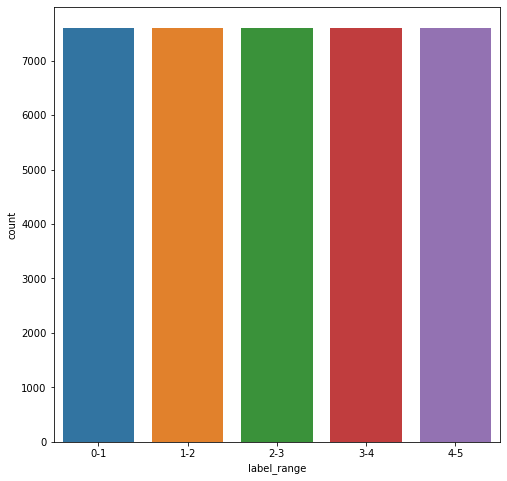

In [12]:
# label_range distribution
plt.figure(figsize=(8, 8))
sns.countplot(train['label_range'], order=['0-1', '1-2', '2-3', '3-4', '4-5'])

In [13]:
train['label_range'].value_counts()

2-3    7604
4-5    7604
3-4    7604
0-1    7604
1-2    7604
Name: label_range, dtype: int64

In [14]:
def data_augmentation(df):

    # sentence swap
    for idx in df.index:
        df.loc[len(df)] = [ 
                        'boostcamp-sts-v1-df-' + str(len(df)), 
                        df['source'][idx],
                        df['sentence_2'][idx], 
                        df['sentence_1'][idx],
                        df['label'][idx],
                        df['binary-label'][idx]
                        ]
    
    # label adjustment
    for idx in df.index:
        if df['label'][idx] == 0:
            df.loc[len(df)] = [ 
                            'boostcamp-sts-v1-df-' + str(len(df)), 
                            df['source'][idx],
                            df['sentence_1'][idx], 
                            df['sentence_1'][idx],
                            5.0,
                            1.0
                            ]
        elif df['label'][idx] == 5:
            df.loc[len(df)] = [ 
                            'boostcamp-sts-v1-df-' + str(len(df)), 
                            df['source'][idx],
                            df['sentence_1'][idx], 
                            df['sentence_1'][idx][::-1],
                            0.0,
                            0.0
                            ]
        
    # data resampling
    # add label_range feature
    dict = {0:'0-1', 1:'1-2', 2:'2-3', 3:'3-4', 4:'4-5', 5:'4-5'}
    for idx in df.index:
        df.loc[idx,'label_range'] = dict[int(df.loc[idx,'label'])]
    (label0, num0), (label1, num1), (label2, num2), (label3, num3), (label4, num4) = (item for item in df['label_range'].value_counts().items())
    samples_1, samples_2, samples_3, samples_4  = (df[df['label_range']==label1].sample(n=num0-num1, replace=True, random_state=42), 
                                                   df[df['label_range']==label2].sample(n=num0-num2, replace=True, random_state=42), 
                                                   df[df['label_range']==label3].sample(n=num0-num3, replace=True, random_state=42), 
                                                   df[df['label_range']==label4].sample(n=num0-num4, replace=True, random_state=42))
    df = pd.concat([df, samples_1, samples_2, samples_3, samples_4], ignore_index=True)
  
    return df

In [15]:
train = pd.read_csv('train.csv')

In [16]:
train = data_augmentation(train)

In [17]:
train.to_csv('train_final.csv', index=False)